<a href="https://colab.research.google.com/github/Yassin-Ali-Youssry/US-Inflation-Forecasting-ARI/blob/main/Forecasting_US_CPI_Growth_Using_Inflation_%26_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Financial EDA & Forecasting System

Objective: Analyze macroeconomic indicators (e.g., inflation) and use them to forecast CPI using ARIMA.


https://fred.stlouisfed.org/series/CPIAUCSL


## Installing Required Packages

In [1]:
import sys
import os

# Suppress all output
sys.stdout = open(os.devnull, 'w')

# Your pip install code
!pip install numpy==1.26.4 pandas==2.2.2 --force-reinstall --no-cache-dir

# Restore output to normal
sys.stdout = sys.__stdout__

In [1]:
import sys
import os

# Suppress all output
sys.stdout = open(os.devnull, 'w')

# Your pip install code
!pip install pmdarima==2.0.3 --no-cache-dir

# Restore output to normal
sys.stdout = sys.__stdout__

## Installing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import pandas_datareader.data as web
from pmdarima import auto_arima

##Step 2: Getting User Inputs

In [2]:
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

Enter start date (YYYY-MM-DD): 2000-01-01
Enter end date (YYYY-MM-DD): 2025-01-01


##Step 3: Load CPI Data

In [3]:
df = web.DataReader('CPIAUCSL', 'fred', start_date, end_date)
df.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)
df.index = pd.to_datetime(df.index)

##Step 4: Calculate YoY Inflation

In [4]:
df['YoY_Inflation'] = df['CPI'].pct_change(periods=12) * 100

##Step 5: Fit ARIMA Model to CPI

Enter forecast period in months: 60


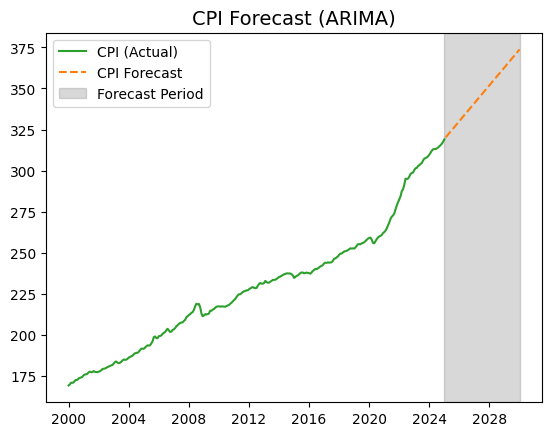

In [5]:
import warnings
import sys
import os
from pmdarima.arima import auto_arima

# Suppress all warnings
warnings.filterwarnings("ignore")

# Redirect stdout to null to suppress any print statements (including trace)
sys.stdout = open(os.devnull, 'w')

# Fit model silently
model = auto_arima(df['CPI'],
                   seasonal=False,
                   stepwise=True,
                   suppress_warnings=True,
                   trace=False)  # Turn off trace output

# Restore stdout after the model is fit
sys.stdout = sys.__stdout__

# Show best ARIMA model only
print(f"Best ARIMA model: {model.summary()}")  # Display model summary

# Ask for forecast period
forecast_period = int(input("Enter forecast period in months: "))
forecast = model.predict(n_periods=forecast_period)

# Create forecast index
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1),
                               periods=forecast_period, freq='MS')
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot forecast (optional)
import matplotlib.pyplot as plt
plt.plot(df.index, df['CPI'], label='CPI (Actual)', color='tab:green')
plt.plot(forecast_series.index, forecast_series, label='CPI Forecast', color='tab:orange', linestyle='--')
plt.axvspan(df.index[-1], forecast_series.index[-1], color='gray', alpha=0.3, label="Forecast Period")
plt.title('CPI Forecast (ARIMA)', fontsize=14)
plt.legend()
plt.show()

##Step 6: Plotting CPI Forecast and Inflation Reference

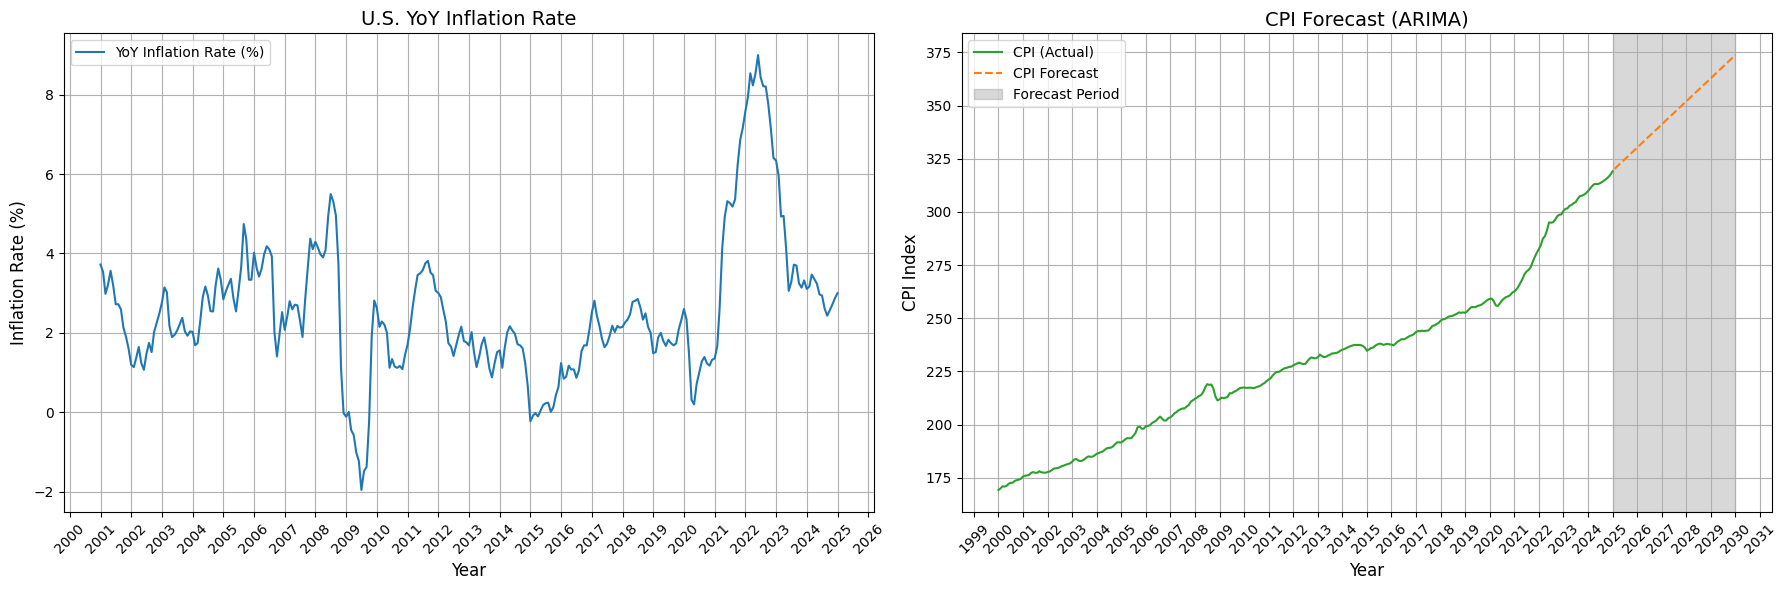

In [6]:
# STEP 5: Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: YoY Inflation
ax1.plot(df.index, df['YoY_Inflation'], color='tab:blue', label='YoY Inflation Rate (%)')
ax1.set_title('U.S. YoY Inflation Rate', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Inflation Rate (%)', fontsize=12)
ax1.grid(True)
ax1.legend()
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', rotation=45)

# Plot 2: CPI Forecast
ax2.plot(df.index, df['CPI'], label='CPI (Actual)', color='tab:green')
ax2.plot(forecast_series.index, forecast_series, label='CPI Forecast', color='tab:orange', linestyle='--')
ax2.axvspan(df.index[-1], forecast_series.index[-1], color='gray', alpha=0.3, label="Forecast Period")
ax2.set_title('CPI Forecast (ARIMA)', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('CPI Index', fontsize=12)
ax2.grid(True)
ax2.legend()
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()